refs: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [1]:
import uproot
import numpy as np
from reco.plotting import plot_event, plot_remapped
from reco.evaluation import evaluate
from reco.event import remap_array_by_label
from reco.energy import get_total_energy
import matplotlib.pyplot as plt
%matplotlib inline

# file_name = "~/Data/pions/new_ntuples_14955802_7.root"
file_name = "~/Data/multi/new_ntuples_14992862_996.root"


tracksters = uproot.open({file_name: "ticlNtuplizer/tracksters"})
simtracksters = uproot.open({file_name: "ticlNtuplizer/simtrackstersSC"})
associations = uproot.open({file_name: "ticlNtuplizer/associations"})

Tracksters reco: 123, tracksters sim: 10
Simulated energy: 3423.19, reconstructed energy: 2886.56 (84.32%)


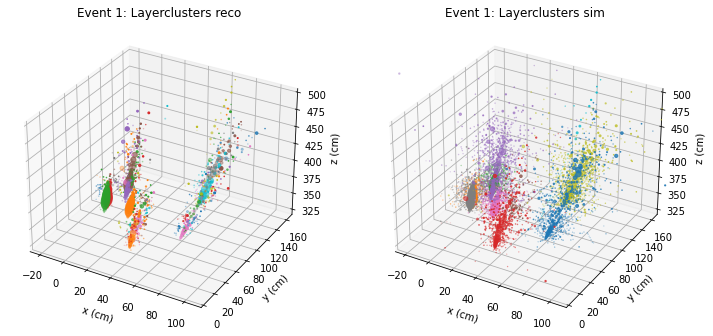

In [2]:
eid = 1

t_indexes = tracksters["vertices_indexes"].array()[eid]
t_energy = tracksters["vertices_energy"].array()[eid]
v_multi = tracksters["vertices_multiplicity"].array()[eid]
st_indexes = simtracksters["stsSC_vertices_indexes"].array()[eid]
st_energy = simtracksters["stsSC_vertices_energy"].array()[eid]
sv_multi = simtracksters["stsSC_vertices_multiplicity"].array()[eid]

print(f"Tracksters reco: {len(t_indexes)}, tracksters sim: {len(st_indexes)}")

reco_total = get_total_energy(t_energy, v_multi)
sim_total = get_total_energy(st_energy, sv_multi)
print(f"Simulated energy: {sim_total:.2f}, reconstructed energy: {reco_total:.2f} ({(reco_total / sim_total) * 100:.2f}%)")

plot_event(tracksters, simtracksters, eid, legend=False)

In [3]:
precision, recall, fscore = evaluate(t_indexes, st_indexes, t_energy, st_energy, v_multi, sv_multi, noise=False)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F-score: {fscore:.2f}")

Precision: 0.97, Recall: 0.16, F-score: 0.28


In [4]:
def evaluate_remapped(labels):
    ri = remap_array_by_label(t_indexes, labels)
    re = remap_array_by_label(t_energy, labels)
    rm = remap_array_by_label(v_multi, labels)
    precision, recall, fscore = evaluate(ri, st_indexes, re, st_energy, rm, sv_multi, noise=False)
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F-score: {fscore:.2f}")
    

In [5]:
x_bary = tracksters["barycenter_x"].array()[eid]
y_bary = tracksters["barycenter_y"].array()[eid]
z_bary = tracksters["barycenter_z"].array()[eid]
X = np.array([x_bary, y_bary, z_bary]).T

- TODO:
- extract features (also about vertices dimensional)

In [42]:
from sklearn.cluster import KMeans

In [55]:
K = len(st_indexes)
kmeans = KMeans(n_clusters=K, random_state=0).fit(X)

In [56]:
evaluate_remapped(kmeans.labels_)

Precision: 0.81, Recall: 0.68, F-score: 0.74


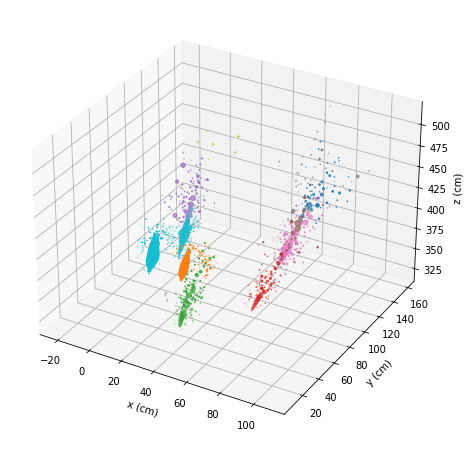

In [57]:
plot_remapped(eid, kmeans.labels_)